# Model fitting and understanding . 
* V2: The operation process is simplified. 

* Turn the warning off: 
~~~~
options(warn=-1)
~~~~
* Turn the warning back on: 
~~~~
options(warn=0)
~~~~
* reference: https://stackoverflow.com/questions/16194212/how-to-suppress-warnings-globally-in-an-r-script

In [1]:
options(warn=-1)

## First step is getting the correlationship between those variables. 

In [2]:
library(rms)
data <- read.csv('J:/EECS6414/process/Pipeline/Data_cleaning/kernel_datassource.csv')# , stringsAsFactors=FALSE

col_name <- names(data)
env_vars <- col_name
vote_num <- data[c("km_votes")]
high_voted <- data[c("high_voted")]
reject_vars <- c(#"kernel_datasets", # because they are all 1, so we can only get NaN. 
                 "kernel", "author", "id", "km_tags", 
                "km_votes", "high_voted",  
                "km_forks", "km_comments", "km_views"
                 #"competition", "organization" # unnecessary variables. 
                 )
env_vars <- env_vars[!(env_vars %in% reject_vars)]
# for (env in env_vars){
#    print(paste(env, "+"))
# }
data <- data[env_vars]

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



png 
  2

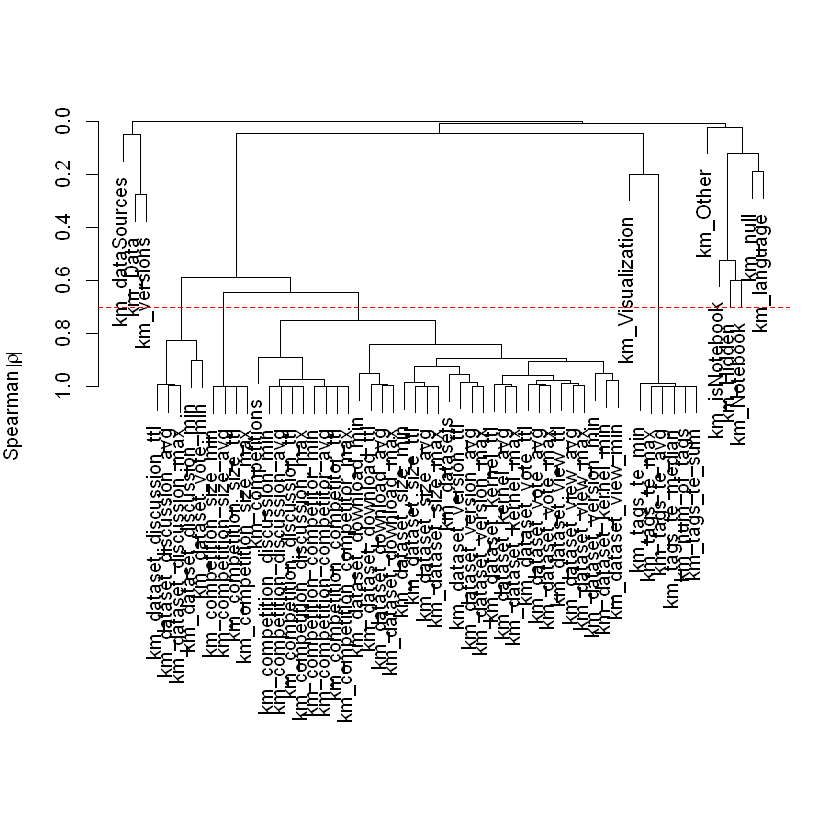

In [3]:
vcobj = varclus(~ ., 
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation.pdf", width = 15, height = 15)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
# reject_vars <- c()
# env_vars <- env_vars[!(env_vars %in% reject_vars)]

In [4]:
env_vars <- c(
    "km_dataSources", 
    "km_Data", 
    "km_versions", 
    "km_dataset_discussion_avg", 
      "km_competition_size_avg", 
      "km_competition_competitor_avg",
    "km_Visualization", 
      "km_tags_te_avg", 
      "km_Other", 
      "km_isNotebook",
      "km_Hidden",
      "km_Notebook",
      "km_null",
      "km_language"
             )
data <- data[env_vars]

png 
  2

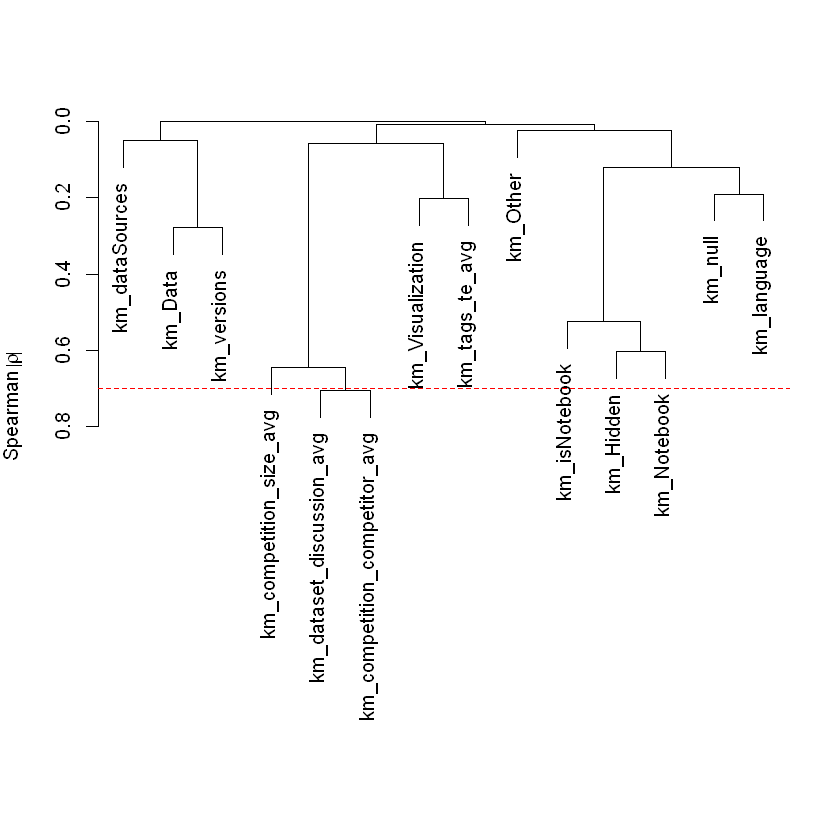

In [6]:
vcobj = varclus(~ .,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation1.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
reject_vars <- c()
env_vars <- env_vars[!(env_vars %in% reject_vars)]

png 
  2

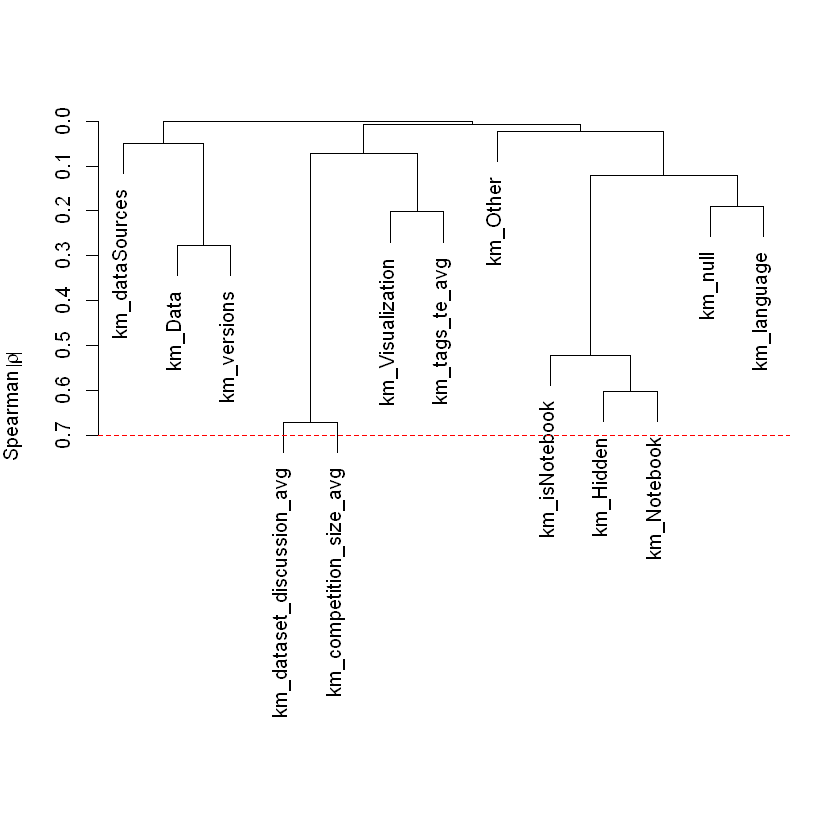

In [5]:
reject_vars <- c("km_competition_competitor_avg")
env_vars <- env_vars[!(env_vars %in% reject_vars)]
data <- data[env_vars]

vcobj = varclus(~ .,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation2.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

## Second Step is to prepare the dataframe, add the voted column back to dataframe. 

random forest model fitting referece: https://www.blopig.com/blog/2017/04/a-very-basic-introduction-to-random-forests-using-r/

### binary classification: 

In [6]:
data_classification = cbind(data, high_voted)

In [7]:
head(data_classification)

km_dataSources,km_Data,km_versions,km_dataset_discussion_avg,km_competition_size_avg,km_Visualization,km_tags_te_avg,km_Other,km_isNotebook,km_Hidden,km_Notebook,km_null,km_language,high_voted
1,1,58,0,2429309862,7,0.57142598,0,0.09271527,2,1,6,0.09296084,True
1,0,2,0,256630325,0,0.07486423,0,0.09271527,1,1,0,0.09296084,True
1,0,1,0,256630325,0,0.07486423,0,0.09271527,1,1,0,0.09296084,True
1,0,5,0,34757,2,0.50374676,0,0.09271527,1,1,0,0.09296084,True
1,0,3,0,256630325,0,0.07486423,0,0.09271527,1,1,0,0.09296084,True
1,1,12,0,256630325,24,0.55366252,0,0.09271527,1,1,0,0.09296084,True


This step is used for generating the binary label. 

## Then Divide the training and testing data

In [8]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(data_classification))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data_classification)), size = smp_size)

train <- data_classification[train_ind, ]
test <- data_classification[-train_ind, ]

### SVM

In [9]:
#install.packages("rminer", repos = "http://cran.us.r-project.org")

if something is wrong, probably you can use this: 
as.factor()

In [ ]:
library(rminer)
M <- fit(high_voted~., data=train, model="svm", kpar=list(sigma=0.10), C=2)
svm.imp <- Importance(M, data=train)

Then we fit the model.

### Logistic Regression

In [9]:
budgetted_DF = floor(min(nrow(train[train$high_voted == "True",]), nrow(train[train$high_voted == "False",]) )/10)#change the /15 to /10
cat("\n\n")
cat(c("3. budgeted_DF: ", budgetted_DF))
cat("\n\n")
cat(c("4. allocation of degree of freedom: "))
cat("\n\n")
cat("5, 6, 7 are as follow: \n")
sink()



3. budgeted_DF:  1510

4. allocation of degree of freedom: 

5, 6, 7 are as follow: 


png 
  2

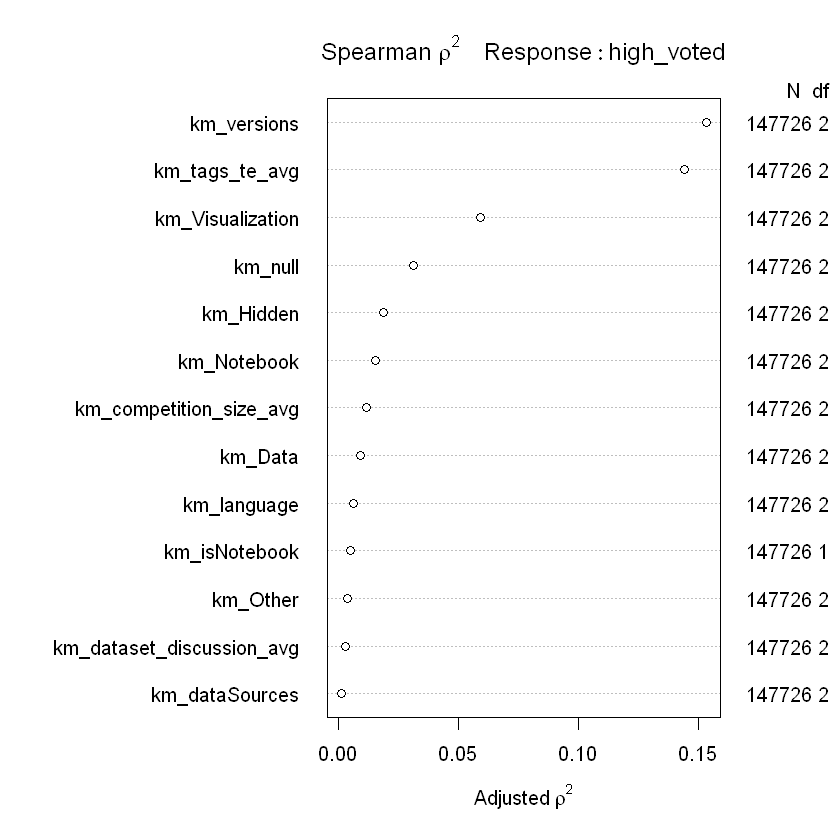

In [11]:
sp <- spearman2(formula(paste("high_voted" ," ~ ",paste0(env_vars, collapse=" + "))), data= train, p=2)
pdf(file="rou2.pdf", 
    width = 11, height = 8.5)
plot(sp)
dev.off()
plot(sp)

In [12]:
print(sp)


Spearman rho^2    Response variable:high_voted

                           rho2        F df1    df2 P Adjusted rho2      n
km_dataSources            0.002   120.84   2 147723 0         0.002 147726
km_Data                   0.009   700.55   2 147723 0         0.009 147726
km_versions               0.153 13352.89   2 147723 0         0.153 147726
km_dataset_discussion_avg 0.003   223.78   2 147723 0         0.003 147726
km_competition_size_avg   0.012   894.80   2 147723 0         0.012 147726
km_Visualization          0.059  4661.37   2 147723 0         0.059 147726
km_tags_te_avg            0.144 12423.09   2 147723 0         0.144 147726
km_Other                  0.004   284.05   2 147723 0         0.004 147726
km_isNotebook             0.005   763.84   1 147724 0         0.005 147726
km_Hidden                 0.019  1432.34   2 147723 0         0.019 147726
km_Notebook               0.016  1179.59   2 147723 0         0.016 147726
km_null                   0.031  2392.61   2 147723

In [19]:
library(rms)
fit <- lrm(high_voted ~ 
           rcs(km_versions, 5) + 
           km_tags_te_avg + 
           km_Visualization + 
            km_null + 
            km_Hidden +
            km_Notebook +
            km_competition_size_avg +
            km_Data +
            km_language +
            km_isNotebook +
            km_Other +
            km_dataset_discussion_avg +
            rcs(km_dataSources, 3),
           data=train, x=T, y=T)

Fewer than 3 unique knots.  Frequency table of variable:
x
     0      1      2      3      4      5      6      7      8      9     10 
  4240 134704   6437   1464    648    134     27     11     14      8      6 
    11     12     13     14     17     19     20     21     57     58 
     9      7      1      5      2      2      1      3      2      1 


ERROR: Error in rcspline.eval(x, nk = nknots, inclx = TRUE, pc = pc, fractied = fractied): 


In [20]:
val <- validate(fit, B=1000)
AUC = 0.5 + val[1,1]/2
AUC_optimism_reduced = (0.5 + val[1,5]/2)
AUC_optimism = AUC - AUC_optimism_reduced
print(c("AUC"=AUC,"AUC_optimism"=AUC_optimism))

         AUC AUC_optimism 
0.6434512055 0.0009310391 
